# PyTorch 深度學習框架套件及常用語法

### 參考文件
### https://pytorch.org/
### https://hackmd.io/@Kuo-Li-Chen/SJSdUwv65
### https://learn.microsoft.com/zh-tw/windows/ai/windows-ml/tutorials/pytorch-installation
### https://ithelp.ithome.com.tw/articles/10273722
### https://ithelp.ithome.com.tw/articles/10277163
### https://rowantseng.medium.com/pytorch-%E8%87%AA%E5%AE%9A%E7%BE%A9%E8%B3%87%E6%96%99%E9%9B%86-custom-dataset-7f9958a8ff15
### https://hackmd.io/@gianghoangcotai/Hkfk2AL_L
### https://www.learnpytorch.io/04_pytorch_custom_datasets/
### https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
### https://www.pytorchmaster.com/1-2%2C%E5%9B%BE%E7%89%87%E6%95%B0%E6%8D%AE%E5%BB%BA%E6%A8%A1%E6%B5%81%E7%A8%8B%E8%8C%83%E4%BE%8B/
### https://www.cnblogs.com/chenhuabin/p/17026018.html
### https://medium.com/ching-i/pytorch-%E5%9F%BA%E6%9C%AC%E4%BB%8B%E7%B4%B9%E8%88%87%E6%95%99%E5%AD%B8-ac0e1ebfd7ec
### https://datawhalechina.github.io/thorough-pytorch/%E7%AC%AC%E4%BA%94%E7%AB%A0/5.1%20PyTorch%E6%A8%A1%E5%9E%8B%E5%AE%9A%E4%B9%89%E7%9A%84%E6%96%B9%E5%BC%8F.html
### https://datawhalechina.github.io/thorough-pytorch/%E7%AC%AC%E4%B8%89%E7%AB%A0/3.1%20%E6%80%9D%E8%80%83%EF%BC%9A%E5%AE%8C%E6%88%90%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%E7%9A%84%E5%BF%85%E8%A6%81%E9%83%A8%E5%88%86.html
### https://datawhalechina.github.io/thorough-pytorch/%E7%AC%AC%E4%B8%89%E7%AB%A0/3.4%20%E6%A8%A1%E5%9E%8B%E6%9E%84%E5%BB%BA.html

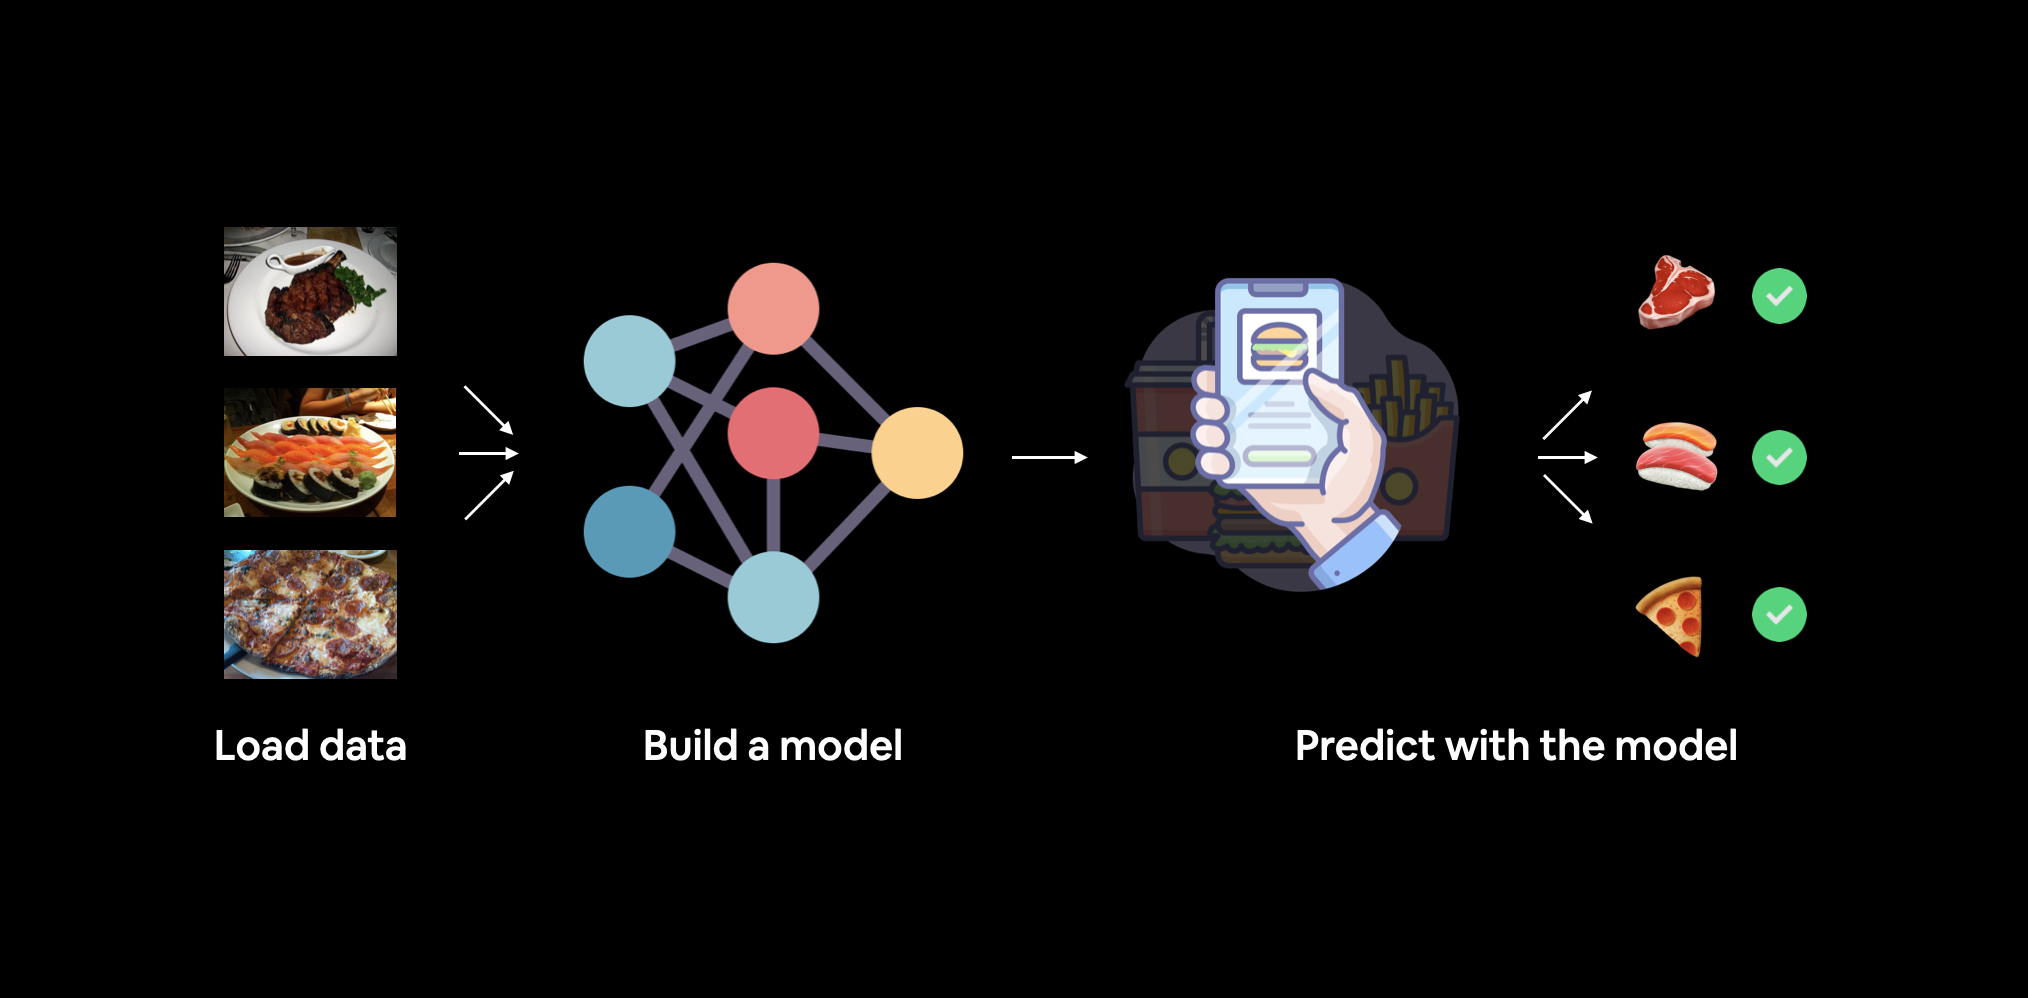

## training a deep learning model with PyTorch 
### Trainer is the training procedure, which takes a model and training data from the data loader, and carries out training and evaluation steps required to train our model
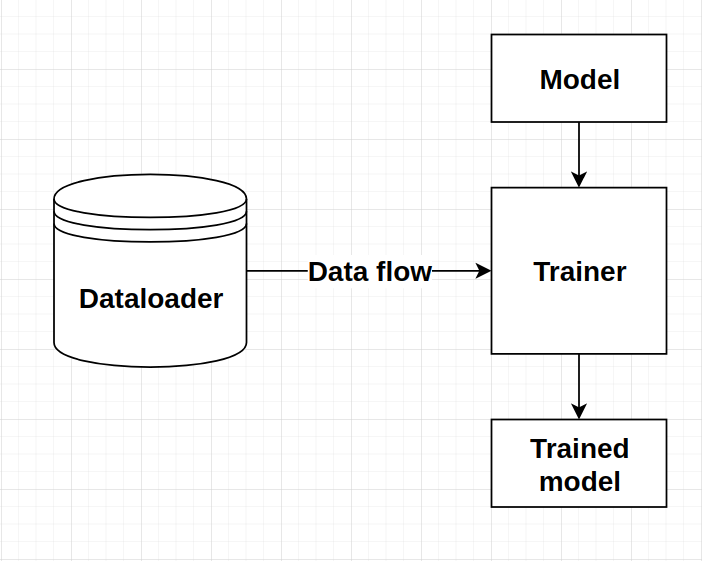

## Forward and backward propagation in training neural networks
<img src="https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Backpropagation.gif" width="550px">


# 思考：如何執行與完成機器學習/深度學習的整體流程?
## 機器學習
### 機器學習有以下幾個重要步驟，首先是數據的預處理，其中重要的步驟包括數據格式的統一、異常數據的消除和必要的數據變換，同時劃分訓練集、驗證集、測試集，常見的方法包括：按比例隨機選取，KFold方法（如之前使用sklearn的test_train_split函數、kfold）。接下來選擇模型，並設定損失函數和優化方法，以及對應的超參數（註一）。最後用模型去擬合訓練集數據，並在驗證集/測試集上計算模型表現。
### 註一 超參數
### 即是在模型訓練之前，事先根據經驗給定的參數，而不同的超參數，訓練出來的模型也不相同，彼此間會有微小的區別，舉例來說：神經網路的超參數有學習率、迭代次數、隱藏層數等，決策樹(Decision Tree)中樹的深度、節點最小樣本數也都屬於超參數。
## 深度學習
### 深度學習和機器學習在流程上類似，但還是有些差異。首先，由於深度學習所需的樣本量很大，一次加載全部數據運行可能會超出內存容量而無法實現；同時還有批（batch）訓練等提高模型表現的策略，需要每次訓練讀取固定數量的樣本送入模型中訓練，因此深度學習在數據加載上需要有專門的設計。
### 在模型實現上，深度學習和機器學習也有很大差異。由於深度神經網絡層數往往較多，同時會有一些用於實現特定功能的層（如卷積層、池化層等），因此深度神經網絡往往需要“逐層”搭建，或者預先定義好可以實現特定功能的這種“定制化”的模型構建方式能夠充分保證模型的靈活性。
### 接下來是損失函數和優化器的設定。這部分和經典機器學習的實現是類似的。但由於模型設定的靈活性，因此損失函數和優化器要能夠保證反向傳播能夠在用戶自行定義的模型結構上實現。
### 上述步驟完成後就可以開始訓練了。GPU可用於並行計算加速，不過程序默認是在CPU上運行的，因此在代碼實現中，需要把模型和數據“放到”GPU上去做運算，同時還需要保證損失函數和優化器能夠在GPU上工作。如果使用多張GPU進行訓練，還需要考慮模型和數據分配、整合的問題。此外，後續計算一些指標還需要把數據“放回”CPU。這裡涉及到了一系列有關於GPU的配置和操作。
### 深度學習中訓練和驗證過程最大的特點在於讀入數據是按批的，每次讀入一個批次的數據，放入GPU中訓練，然後將損失函數反向傳播回網絡最前面的層，同時使用優化器調整網絡參數。這裡會涉及到各個模塊配合的問題。訓練/驗證後還需要根據設定好的指標計算模型表現。
### 經過以上步驟，一個深度學習任務才完成

## PyTorch 基本套件
### 使用 PyTorch,需要導入一些Python常用的套件來幫助我們快速實現功能。常見的套件有os、numpy等，此外還需要調用PyTorch自身一些套件便於靈活使用，比如torch、torch.nn、torch.utils.data.Dataset、torch.utils.data.DataLoader、torch.optimizer等等。如涉及到表格信息的讀入很可能用到pandas，對於不同的圖影項目可能還需要導入一些更上層的套件如cv2等。如果涉及可視化還會用到matplotlib、seaborn等。涉及到下游分析和指標計算也常用到sklearn。


In [11]:
!pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 1.3 MB/s eta 0:00:10
   ---------------------------------------- 0.1/11.6 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.3/11.6 MB 2.3 MB/s eta 0:00:06
   - -------------------------------------- 0.5/11.6 MB 3.3 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.6 MB 5.0 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.6 MB 8.4 MB/s eta 0:00:02
   ------------- -------------------------- 4.0/11.6 MB 13.3 MB/s eta 0:00:01
   ----------------- ---------------------- 5.0/11.6 MB 14.5 MB/s eta 0:00:01
   ------------------------- -------------- 7.5/11.6 MB 18.4 MB/s eta 0:00:01
   -------------------------- ------------- 7.7/11.6 MB 19.0 MB/s eta 0:00:01
   ------------------------------------- -- 10.9/11.6 MB 32.8 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 36.3 MB/s eta 0:00:0

In [12]:
!pip install matplotlib

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ------- ------------------------------- 30.7/165.5 kB 1.4 MB/s eta 0:00:01
     ------------------- ------------------- 81.9/165.5 kB 1.2 MB/s eta 0:00:01
     -------------------------------------  163.8/165.5 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.9 MB 2.2 MB/s eta 0:00:04
    --------------------------------------- 0.2/7.9 MB 2.1 MB/s eta 0:00:04
   - -------------------------------------- 0.3/7.9 MB 2.1 MB/s eta 0:00:04
   - -------------------------------------- 0.4/7.9 MB 2.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/7.9 MB 2.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/7.9 MB 2.0 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/7.9 MB 2.1 MB/s eta 0:00:04
   ---

In [13]:
import os 
import numpy as np 
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optimizer

## 深度學習的超參數 配置
<ul class="simple">
<li><p><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">batch size</font></font></p></li>
<li><p><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">初始學習率（初始）</font></font></p></li>
<li><p><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">訓練次數（max_epochs）</font></font></p></li>
<li><p><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">GPU配置</font></font></p></li>
</ul>

In [14]:
batch_size = 16
# 批次的大小
lr = 1e-4
# 优化器的学习率
max_epochs = 100

## GPU的設置
### 數據和模型如果沒有指明設備，默認會存儲在CPU上，為了加速模型的訓練，我們需要調用GPU，一般情況下GPU的設置有兩種常見的方式：

In [15]:
# 方案一：使用os.environ，这种情况如果使用GPU不需要设置
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0' # 指明调用的GPU为0,1号

# 方案二：使用“device”，后续对要使用GPU的变量用.to(device)即可
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # 指明调用的GPU为1号

## ==> 先了解 PyTorch 的 Tensor(張量)
### 張量是一種特殊的數據結構，與數組和矩陣非常相似。在 PyTorch 中，我們使用張量對模型的輸入和輸出以及模型的參數進行編碼。
### PyTorch的多維度矩陣與numpy相似,一個高維度向量，也是深度學習裡進行運算的基本元素。
### 可以在GPU上進行運算，而python numpy不能
### numpy array 可以轉換成tensor
### 預設數值型態 float32

In [16]:
import torch 
import numpy as np
#創建空的 tensor 
#torch.empty()
x = torch.empty(2)
print(x)
#多維
x = torch.empty(2, 3)
print(x)
#創建 0 tensor 
#torch.zeros()
x = torch.zeros(2, 3)
print(x)
#創建 random tensor 
#torch.rand()
x = torch.rand(2, 3)
print(x)
#創建 1 tensor 
#torch.ones()
x = torch.ones(2, 3)
print(x)


tensor([   inf, 1.8750])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.4319, 0.6491, 0.3357],
        [0.6528, 0.9940, 0.9858]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [17]:
#檢查資料型態 torch.dtype
x = torch.ones(2, 3)
print(x.dtype)
#賦予資料型態
x = torch.ones(2, 3, dtype=torch.int)
print(x.dtype)
#資料大小 torch.size()
x = torch.ones(2, 3)
print(x.size())
#直接賦值
x = torch.tensor([2, 3])
print(x)
# tensor([2, 3])
print(x.size())
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)
#從 NumPy 數組創建張量
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)


torch.float32
torch.int32
torch.Size([2, 3])
tensor([2, 3])
torch.Size([2])
tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


### tensor初始化建立在cpu上，如果可使用gpu則可以用to()函式，將tensor搬移到gpu

In [18]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    x = torch.ones(5, device=device)
    y = torch.ones(5)
    y = y.to(device)
    z = x + y
    print(z)

tensor([2., 2., 2., 2., 2.], device='cuda:0')


### 張量的屬性總結
### 張量屬性描述了它們的形狀、數據類型和存儲它們的設備。

In [19]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

device = torch.device("cuda")
y = tensor.to(device)
print(f"Shape of tensor: {y.shape}")
print(f"Datatype of tensor: {y.dtype}")
print(f"Device tensor is stored on: {y.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cuda:0


### Tensor items==>取得 Tensor 之中的 items 
### Tensor Indexing
#### tensor[row][col] 先列在行

In [20]:
x = torch.rand(5, 3)
print(x)

tensor([[0.0635, 0.4266, 0.4710],
        [0.6514, 0.1370, 0.3836],
        [0.0406, 0.3086, 0.6525],
        [0.0143, 0.1002, 0.8043],
        [0.0863, 0.0832, 0.7710]])


In [21]:
#取得第一 row 的data
print(x[0, :])
#取得第一 column 的data
print(x[:, 0])
#取得第一 row, 取得第一 column 的data
print(x[0, 0])
#Reshape 
y = x.view(15)
print(y)

tensor([0.0635, 0.4266, 0.4710])
tensor([0.0635, 0.6514, 0.0406, 0.0143, 0.0863])
tensor(0.0635)
tensor([0.0635, 0.4266, 0.4710, 0.6514, 0.1370, 0.3836, 0.0406, 0.3086, 0.6525,
        0.0143, 0.1002, 0.8043, 0.0863, 0.0832, 0.7710])


## ==>DataSet ,DataLoader(數據集和數據加載器)
### PyTorch 提供的資料處理工具
### ==>torch.utils.data.DataLoader,torch.utils.data.Dataset
### torch.utils.data.DataLoader允許torch.utils.data.Dataset 使用預加載的數據集以及自定義資料集 (Custom Dataset)。
## Dataset存儲樣本及其相應的標籤，DataLoader在 周圍包裝一個可迭代對象Dataset，以便輕鬆訪問樣本。
### 也就是說 torch.utils.data.DataLoader類別，定義如何取樣資料，以及使用多少資源來得到一個批次 (batch) 的資料。
### 每次從dataset中取出的資料可以是隨機抽取的，或是使用特定的batch size訓練資料，又或者是希望可以使用Python的平行處理加速運算， 因此DataLoader在這時就擔任了包裝上述功能的工具。
## DataLoader
### DataLoader主要參數
<ul>
<li><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">dataset：表示Dataset類，它決定了數據從哪讀取以及如何讀取；</font></font></li>
<li><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">batch_size：表示批大小；</font></font></li>
<li><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">num_works：表示是否多進程讀取數據；</font></font></li>
<li><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">shuffle：表示每個epoch是否亂序；</font></font></li>
<li><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">drop_last：表示當樣本數不能被batch_size整除時，是否捨棄最後一批數據；</font></font></li>
<li><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">num_workers：啟動多少個進程來加載數據。</font></font></li>
</ul>

### EXAMPLE: 建立 DataLoader，shuffle 為 True 表示會將資料進行打亂
### ==>data_loader = DataLoader(dataset = image_folder, batch_size= 100, shuffle= True, num_workers= 2)
## PyTorch 提供了許多預加載的數據集：圖像數據集、 文本數據集和 音頻數據集
### Torchvision 在模塊中提供了許多內置數據集torchvision.datasets 
### 圖像數據集:https://pytorch.org/vision/stable/datasets.html
### 文本數據集:https://pytorch.org/text/stable/datasets.html
### 音頻數據集:https://pytorch.org/audio/stable/datasets.html

## 自定義數據集
### 用來處理自定義資料集 (Custom Dataset),要實做三個函數：__init__、__len__和__getitem__。
### dataset的data 都要是數值

In [22]:
import torch
from torch.utils.data import Dataset

# 這兩個是資料處裡常用的套件
import numpy as np
import pandas as pd

# example of dataset create
class ExampleDataset(Dataset):

    # data loading
    def __init__(self):
        xy = np.loadtxt('./datasetexample.csv', delimiter=',', encoding="utf8",  skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:5])
        self.y = torch.from_numpy(xy[:, [5]])
        self.n_samples = xy.shape[0]

    # working for indexing
    def __getitem__(self, index):
        
        return self.x[index], self.y[index]

    # return the length of our dataset
    def __len__(self):
        
        return self.n_samples

In [23]:
dataset = ExampleDataset()

# pick first data
first_data = dataset[0]
features, labels = first_data
print(features)
print(labels)
print("count="+str(len(dataset)))

tensor([ 35., 800., 100.,   1.], dtype=torch.float64)
tensor([90.], dtype=torch.float64)
count=29


## 內建資料集
###  torchvision.datasets
### PyTorch 提供以下常用公開資料集
<ul class=""><li id="2d53" class="lh li ev lk b ll lm ln lo lp lq lr ls lt lu lv lw lx ly lz ma mb mc md me mf nq nr ns bj" data-selectable-paragraph="">影像辨識：<a class="af ld" href="http://yann.lecun.com/exdb/mnist/" rel="noopener ugc nofollow" target="_blank">MNIST</a>(手寫數字)、<a class="af ld" href="https://www.nist.gov/itl/iad/image-group/emnist-dataset" rel="noopener ugc nofollow" target="_blank">EMNIST</a>(手寫數字)、<a class="af ld" href="https://github.com/facebookresearch/qmnist" rel="noopener ugc nofollow" target="_blank">QMNIST</a>(手寫數字)、<a class="af ld" href="https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html#usps" rel="noopener ugc nofollow" target="_blank">USPS</a>(手寫數字)、<a class="af ld" href="https://github.com/rois-codh/kmnist" rel="noopener ugc nofollow" target="_blank">KMNIST</a>(手寫日文字)、<a class="af ld" href="https://github.com/zalandoresearch/fashion-mnist" rel="noopener ugc nofollow" target="_blank">Fashion-MNIST</a>(衣著)、<a class="af ld" href="https://www.yf.io/p/lsun" rel="noopener ugc nofollow" target="_blank">LSUN</a>(物件、場景)、<a class="af ld" href="https://github.com/facebook/fb.resnet.torch/blob/master/INSTALL.md#download-the-imagenet-dataset" rel="noopener ugc nofollow" target="_blank">Imagenet</a>(物件、場景)、<a class="af ld" href="https://www.cs.toronto.edu/~kriz/cifar.html" rel="noopener ugc nofollow" target="_blank">CIFAR10</a>(物件)、<a class="af ld" href="https://www.cs.toronto.edu/~kriz/cifar.html" rel="noopener ugc nofollow" target="_blank">CIFAR100</a>(物件)、<a class="af ld" href="https://cs.stanford.edu/~acoates/stl10/" rel="noopener ugc nofollow" target="_blank">STL10</a>(動物、交通)、<a class="af ld" href="http://ufldl.stanford.edu/housenumbers/" rel="noopener ugc nofollow" target="_blank">SVHN</a>(門牌數字)、<a class="af ld" href="http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html" rel="noopener ugc nofollow" target="_blank">CelebA</a>(人臉 ID、屬性、特徵點)</li><li id="7431" class="lh li ev lk b ll nt ln lo lp nu lr ls lt nv lv lw lx nw lz ma mb nx md me mf nq nr ns bj" data-selectable-paragraph="">物件偵測：<a class="af ld" href="http://cocodataset.org/#home" rel="noopener ugc nofollow" target="_blank">MS COCO</a>、VOCDetection</li><li id="59c7" class="lh li ev lk b ll nt ln lo lp nu lr ls lt nv lv lw lx nw lz ma mb nx md me mf nq nr ns bj" data-selectable-paragraph="">影像分割：VOCSegmentation、<a class="af ld" href="https://www.cityscapes-dataset.com/" rel="noopener ugc nofollow" target="_blank">Cityscapes</a></li><li id="2517" class="lh li ev lk b ll nt ln lo lp nu lr ls lt nv lv lw lx nw lz ma mb nx md me mf nq nr ns bj" data-selectable-paragraph="">標題生成：<a class="af ld" href="http://cocodataset.org/#home" rel="noopener ugc nofollow" target="_blank">MS COCO</a>、<a class="af ld" href="http://www.cs.virginia.edu/~vicente/sbucaptions/" rel="noopener ugc nofollow" target="_blank">SBU</a>、<a class="af ld" href="http://hockenmaier.cs.illinois.edu/8k-pictures.html" rel="noopener ugc nofollow" target="_blank">Flickr8k</a>、<a class="af ld" href="http://bryanplummer.com/Flickr30kEntities/" rel="noopener ugc nofollow" target="_blank">Flickr30k</a></li><li id="0ce7" class="lh li ev lk b ll nt ln lo lp nu lr ls lt nv lv lw lx nw lz ma mb nx md me mf nq nr ns bj" data-selectable-paragraph="">動作辨識：<a class="af ld" href="https://deepmind.com/research/open-source/kinetics" rel="noopener ugc nofollow" target="_blank">Kinetics400</a>(影片)、<a class="af ld" href="https://serre-lab.clps.brown.edu/resource/hmdb-a-large-human-motion-database/" rel="noopener ugc nofollow" target="_blank">HMDB51</a>(影片)、<a class="af ld" href="https://www.crcv.ucf.edu/data/UCF101.php" rel="noopener ugc nofollow" target="_blank">UCF101</a>(影片)</li><li id="9572" class="lh li ev lk b ll nt ln lo lp nu lr ls lt nv lv lw lx nw lz ma mb nx md me mf nq nr ns bj" data-selectable-paragraph="">假影像資料生成：FakeData(可以給定影像大小、資料集大小和類別數)</li><li id="7acc" class="lh li ev lk b ll nt ln lo lp nu lr ls lt nv lv lw lx nw lz ma mb nx md me mf nq nr ns bj" data-selectable-paragraph="">其他：<a class="af ld" href="http://phototour.cs.washington.edu/patches/default.htm" rel="noopener ugc nofollow" target="_blank">PhotoTour</a>(局部影像)、<a class="af ld" href="http://home.bharathh.info/pubs/codes/SBD/download.html" rel="noopener ugc nofollow" target="_blank">SBDataset</a>(物件邊緣)</li><li id="1a12" class="lh li ev lk b ll nt ln lo lp nu lr ls lt nv lv lw lx nw lz ma mb nx md me mf nq nr ns bj" data-selectable-paragraph="">通用格式：ImageFolder、DatasetFolder</li></ul>

### 公開資料集常用參數
<ul class="simple">
<li><p><code class="docutils literal notranslate"><span class="pre">root</span></code><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">是存儲訓練/測試數據的路徑，</font></font></p></li>
<li><p><code class="docutils literal notranslate"><span class="pre">train</span></code><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">指定訓練或測試數據集，TRUE==>TRAIN,FALSE==>TEST</font></font></p></li>
<li><p><code class="docutils literal notranslate"><span class="pre">download=True</span></code><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">如果在 處不可用，則從 Internet 下載數據</font></font><code class="docutils literal notranslate"><span class="pre">root</span></code><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">。</font></font></p></li>
<li><p><code class="docutils literal notranslate"><span class="pre">transform</span></code><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">並</font></font><code class="docutils literal notranslate"><span class="pre">target_transform</span></code><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">指定特徵和標籤轉換</font></font></p></li>
</ul>

### Example1:Fashion-MNIST數據集
#### 如何從 TorchVision 加載Fashion-MNIST數據集的示例。Fashion-MNIST 是 Zalando 的文章圖像數據集，由 60,000 個訓練示例和 10,000 個測試示例組成。每個示例包含一個 28×28 的灰度圖像和來自 10 個類別之一的關聯標籤。

In [24]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


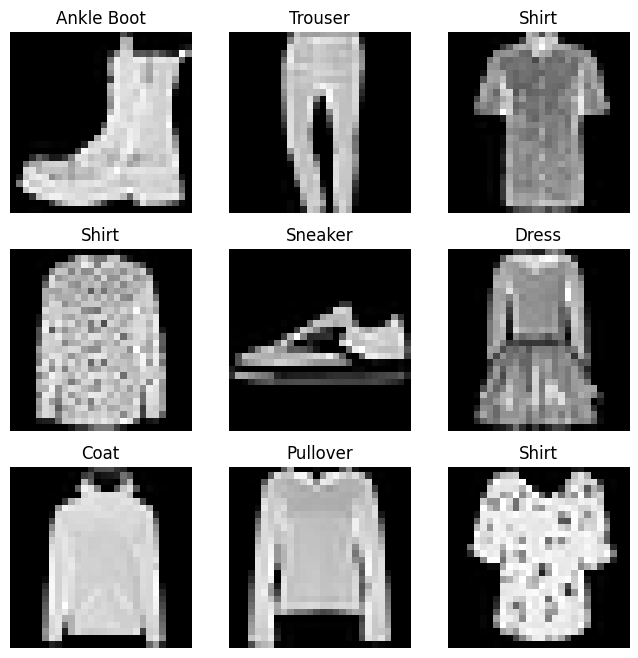

In [25]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Example2:CIFAR10 資料集
#### 使用 CIFAR10 資料集來建置和定型影像分類模型。 CIFAR10 是機器學習研究廣泛使用的資料集。 其中包含 50，000 個訓練影像和 10，000 個測試影像。 全部大小都是 3x32x32，這表示大小為 32x32 圖元的 3 頻道色彩影像。

影像分成 10 個類別：「飛機」 (0) 、「汽車」 (1) 、「鳥」 (2) 、 'cat' (3) 、 'deer' (4) ， 'dog' (5) ， 'frog' (6) ， 'horse' (7) ， 'ship' (8) ， 'truck' (9) 。

In [26]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

# Loading and normalizing the data.
# Define transformations for the training and test sets
transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# CIFAR10 dataset consists of 50K training images. We define the batch size of 10 to load 5,000 batches of images.
batch_size = 10
number_of_labels = 10 

# Create an instance for training. 
# When we run this code for the first time, the CIFAR10 train dataset will be downloaded locally. 
train_set =CIFAR10(root="./data",train=True,transform=transformations,download=True)

# Create a loader for the training set which will read the data within batch size and put into memory.
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
print("The number of images in a training set is: ", len(train_loader)*batch_size)

# Create an instance for testing, note that train is set to False.
# When we run this code for the first time, the CIFAR10 test dataset will be downloaded locally. 
test_set = CIFAR10(root="./data", train=False, transform=transformations, download=True)

# Create a loader for the test set which will read the data within batch size and put into memory. 
# Note that each shuffle is set to false for the test loader.
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0)
print("The number of images in a test set is: ", len(test_loader)*batch_size)

print("The number of batches per epoch is: ", len(train_loader))
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
The number of images in a training set is:  50000
Files already downloaded and verified
The number of images in a test set is:  10000
The number of batches per epoch is:  5000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8901961..0.7411765].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9529412..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9529412..0.427451].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7019608].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9372549..0.8745098].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8745098..0.7490196].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9372549..1.0].
Clip

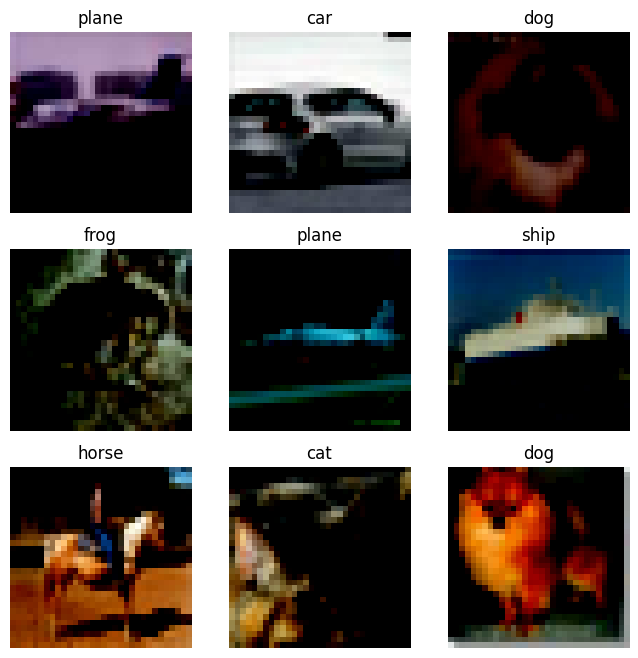

In [27]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(classes[label])
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0))
   
plt.show()
   

### Example3:MS COCO 資料集
#### PyTorch 提供兩種 MS COCO 資料集，分別為生成影像 caption 的dset.CocoCaptions，以及物件偵測用的dset.CocoDetection。首先，先進行 pycocotools套件安裝。
### 參數
### root:傳入影像位址
### annFile: 標記 json 檔位址
###  COCO 資料集,需先下載,請參照地址
#### https://cocodataset.org/#download


In [28]:
!pip install Cython

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB 682.7 kB/s eta 0:00:05
    --------------------------------------- 0.0/2.8 MB 495.5 kB/s eta 0:00:06
   -- ------------------------------------- 0.2/2.8 MB 1.3 MB/s eta 0:00:03
   ----- ---------------------------------- 0.4/2.8 MB 2.3 MB/s eta 0:00:02
   ----------- ---------------------------- 0.8/2.8 MB 3.8 MB/s eta 0:00:01
   ----------------------- ---------------- 1.6/2.8 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 8.9 MB/s eta 0:00:00


In [1]:
!pip install "git+https://github.com/philferriere/cocoapi.git#egg=pycocotools&subdirectory=PythonAPI"

  Cloning https://github.com/philferriere/cocoapi.git to c:\users\hgtma\appdata\local\temp\pip-install-sxw_fa4x\pycocotools_d8738fbd4cbf45b99afa7403c4b53809
  Resolved https://github.com/philferriere/cocoapi.git to commit 2929bd2ef6b451054755dfd7ceb09278f935f7ad
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pycocotools
Failed to build pycocotools


  Running command git clone --filter=blob:none --quiet https://github.com/philferriere/cocoapi.git 'C:\Users\hgtma\AppData\Local\Temp\pip-install-sxw_fa4x\pycocotools_d8738fbd4cbf45b99afa7403c4b53809'
  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [1 lines of output]
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pycocotools
  error: subprocess-exited-with-error
  
  python setup.py clean did not run successfully.
  exit code: 1
  
  [12 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\hgtma\AppData\Local\Temp\pip-install-sxw_fa4x\pycocotools_d873

###  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools"
### 需要下載安裝 Microsoft Visual C++ 可轉散發套件
### https://learn.microsoft.com/zh-tw/cpp/windows/latest-supported-vc-redist?view=msvc-170
###

In [ ]:
!pip install pycocotools

In [1]:
import torchvision.datasets as dset
import torchvision.transforms as trns

# create mscoco caption train dataset
cap_train = dset.CocoCaptions(root='./dataset/mscoco/train2014',
                              annFile='./dataset/mscoco/annotations/captions_train2014.json',
                              transform=trns.ToTensor())

print('\n\nTotal train data: ', len(cap_train))
img, target = cap_train[25]

print('Image Size: ', img.size())
print('Captions  : ', target)

# create mscoco caption validation dataset
cap_val = dset.CocoCaptions(root='./dataset/mscoco/val2014',
                            annFile='./dataset/mscoco/annotations/captions_val2014.json',
                            transform=trns.ToTensor())

print('\n\nTotal validation data: ', len(cap_val))

loading annotations into memory...
Done (t=0.50s)
creating index...
index created!


Total train data:  82783
Image Size:  torch.Size([3, 640, 480])
Captions  :  ['A stop sign directs pedestrians as a train travels by.', 'A stop sign sits in the middle of the forest. ', 'A stop sign sitting near some tall trees.', 'A man leans out of a vehicle near a short stop sign in a forest.', 'A stop sign is shown close to the ground.']
loading annotations into memory...
Done (t=0.36s)
creating index...
index created!


Total validation data:  40504


In [2]:
import torchvision.datasets as dset
import torchvision.transforms as trns

# create mscoco detection train dataset
det_train = dset.CocoDetection(root='./dataset/mscoco/train2014',
                               annFile='./dataset/mscoco/annotations/instances_train2014.json',
                               transform=trns.ToTensor())

print('\n\nTotal train data: ', len(det_train))
img, obj_annos = det_train[25]

print('Image Size   : ', img.size())
print('Total objects: ', len(obj_annos))

# each object annotation including seven items:
# segmentation, area, iscrowd, image_id, bbox, category_id, id
for i, anno in enumerate(obj_annos):
    print ('\n\n---Object ', i)
    for k, v in anno.items():
        print (k, v)

loading annotations into memory...
Done (t=9.32s)
creating index...
index created!


Total train data:  82783
Image Size   :  torch.Size([3, 640, 480])
Total objects:  3


---Object  0
segmentation [[439.98, 108.18, 437.5, 103.22, 437.91, 99.09, 437.09, 94.96, 434.61, 90.83, 434.61, 86.7, 434.61, 83.81, 435.44, 79.68, 436.26, 79.27, 435.02, 75.96, 436.68, 71.01, 444.11, 66.88, 447.0, 64.4, 450.3, 63.98, 452.78, 63.57, 456.91, 61.51, 458.56, 61.92, 461.46, 61.92, 463.11, 61.92, 464.35, 61.92, 465.17, 62.33, 457.74, 111.89, 455.26, 114.37, 449.48, 114.79, 447.0, 114.79, 450.72, 111.89, 450.3, 106.94, 447.0, 104.46, 443.7, 104.46, 442.46, 105.29, 440.39, 107.35]]
area 1117.22285
iscrowd 0
image_id 151
bbox [434.61, 61.51, 30.56, 53.28]
category_id 1
id 1189207


---Object  1
segmentation [[336.01, 388.88, 405.28, 256.99, 416.66, 207.65, 430.9, 189.62, 444.18, 167.8, 460.31, 102.33, 470.75, 16.93, 479.29, 4.6, 480.0, 321.52, 480.0, 516.03, 480.0, 636.54, 210.76, 640.0, 312.29, 426.84, 316.

### Example4:ImageFolder class及DatasetFolder class


<p id="4c46" class="pw-post-body-paragraph lh li ev lk b ll lm ln lo lp lq lr ls mk lu lv lw ml ly lz ma mm mc md me mf eo bj" data-selectable-paragraph="">其中，通用格式的<code class="cw mg mh mi mj b">ImageFolder class</code>是辨識任務經常使用的影像資料集格式，會依照資料夾儲存的影像，建立每張影像歸屬之類別，如下所示。</p>

<pre class="ny nz oa ob oc od mj oe of ax og bj"><span id="2c1e" class="oh mo ev mj b gr oi oj l ok ol" data-selectable-paragraph="">root/dog/001.png<br>root/dog/002.png<br>root/dog/003.png</span><span id="cb20" class="oh mo ev mj b gr om oj l ok ol" data-selectable-paragraph="">root/cat/cat.png<br>root/cat/cat1.png<br>root/cat/cat_.png</span></pre>

<p id="2f72" class="pw-post-body-paragraph lh li ev lk b ll lm ln lo lp lq lr ls mk lu lv lw ml ly lz ma mm mc md me mf eo bj" data-selectable-paragraph="">而<code class="cw mg mh mi mj b">DatasetFolder class</code>則不限定資料集為影像，同樣會依照資料夾儲存的影像，建立每張影像歸屬之類別，如下所示。</p>

<pre class="ny nz oa ob oc od mj oe of ax og bj"><span id="8941" class="oh mo ev mj b gr oi oj l ok ol" data-selectable-paragraph="">root/dog/001.txt<br>root/dog/002.txt<br>root/dog/003.txt</span><span id="5f4f" class="oh mo ev mj b gr om oj l ok ol" data-selectable-paragraph="">root/cat/cat.txt<br>root/cat/cat1.txt<br>root/cat/cat_.txt</span></pre>

### 透過 torchvision.datasets.ImageFolder 來讀取資料，主要用於影像資料，默認已將資料分成不同類別，
### 下載使用 Kaggle 的貓狗圖像 為資料集，其資料已分為貓和狗各類別放置。
### https://www.kaggle.com/datasets/chetankv/dogs-cats-images
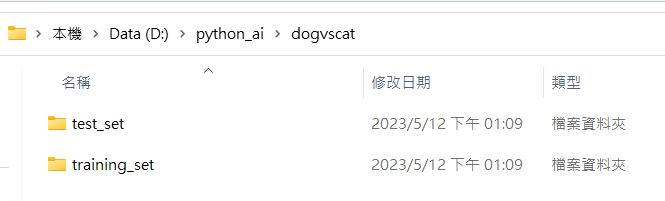
### 接著使用 torchvision.datasets.ImageFolder 來讀取資料，其中 transform 為對輸入影像進行 Data Augmentation、target_transform 為對輸入影像的 label 進行轉換。

In [3]:
from torchvision.datasets import ImageFolder
image_folder_train = ImageFolder("./dogvscat/training_set", transform=None, target_transform=None)
print(image_folder_train.class_to_idx)


{'cats': 0, 'dogs': 1}


In [4]:
#整合DataLoader
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
train_transform = transforms.Compose([
                  transforms.Resize((256, 256)),
                  transforms.ToTensor(),
                  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
# 使用 torchvision.datasets.ImageFolder 讀取貓狗資料
image_folder_train = ImageFolder("./dogvscat/training_set", transform=train_transform, target_transform=None)
# 建立 DataLoader，shuffle 為 True 表示會將資料進行打亂
data_loader_train = DataLoader(dataset = image_folder_train, batch_size= 100, shuffle= True, num_workers= 2)
# 列印數據
for batch_idx, (data, target) in enumerate(data_loader_train):
     print("data:", data)
     print("label:", target)

data: tensor([[[[ 0.2796,  0.2453,  0.2453,  ..., -0.3369, -0.4054, -0.4397],
          [ 0.2796,  0.2453,  0.2453,  ..., -0.3883, -0.4397, -0.4739],
          [ 0.2967,  0.2453,  0.2453,  ..., -0.4054, -0.4397, -0.4739],
          ...,
          [ 0.5022,  0.4851,  0.4508,  ...,  0.0227,  0.0227,  0.0398],
          [ 0.4851,  0.4679,  0.4508,  ...,  0.0227,  0.0227,  0.0398],
          [ 0.5022,  0.4851,  0.4508,  ..., -0.0287, -0.0287, -0.0116]],

         [[-0.3550, -0.3901, -0.3901,  ..., -0.4601, -0.5301, -0.5651],
          [-0.3550, -0.3901, -0.3901,  ..., -0.5126, -0.5651, -0.6001],
          [-0.3375, -0.3901, -0.3901,  ..., -0.5301, -0.5651, -0.6001],
          ...,
          [ 0.6954,  0.6779,  0.6604,  ..., -0.3725, -0.3725, -0.3550],
          [ 0.6779,  0.6604,  0.6604,  ..., -0.3725, -0.3725, -0.3550],
          [ 0.6954,  0.6779,  0.6604,  ..., -0.4251, -0.4251, -0.4076]],

         [[-0.1138, -0.1487, -0.1487,  ..., -0.2881, -0.3578, -0.3927],
          [-0.1138, -0.1

data: tensor([[[[ 0.7933,  0.8276,  0.8789,  ...,  0.0227,  0.0398,  0.0227],
          [ 0.9474,  0.9474,  0.9646,  ...,  0.0056,  0.0227, -0.0287],
          [ 1.0159,  0.9817,  0.9474,  ...,  0.0398,  0.0741, -0.0116],
          ...,
          [ 0.8961,  0.7248,  0.5193,  ...,  0.1083,  0.0227,  0.0912],
          [ 0.6392,  0.5536,  0.3823,  ...,  0.1939,  0.1254,  0.1768],
          [-0.7993, -0.7650, -0.8678,  ..., -1.0219, -1.0904, -1.0390]],

         [[ 0.3978,  0.4328,  0.4853,  ..., -0.0924, -0.0924, -0.1099],
          [ 0.5553,  0.5553,  0.5728,  ..., -0.1099, -0.0924, -0.1800],
          [ 0.6429,  0.6078,  0.5728,  ..., -0.0749, -0.0749, -0.1625],
          ...,
          [ 0.5903,  0.4503,  0.2577,  ..., -0.2150, -0.1975, -0.0924],
          [ 0.3452,  0.2752,  0.1176,  ..., -0.1275, -0.1099, -0.0049],
          [-1.1429, -1.0728, -1.1429,  ..., -1.3704, -1.3529, -1.2479]],

         [[ 0.1128,  0.1476,  0.1825,  ..., -0.4275, -0.3055, -0.2358],
          [ 0.2348,  0.2

data: tensor([[[[ 0.0056, -0.0801, -0.0801,  ...,  0.2111,  0.1254, -0.0116],
          [-0.1486, -0.0458, -0.0287,  ...,  0.1939,  0.1254, -0.0458],
          [-0.3712, -0.0972, -0.0801,  ...,  0.2282,  0.1254, -0.1657],
          ...,
          [-0.8507, -0.7993, -0.7479,  ..., -1.1247, -0.5424, -0.2856],
          [-0.7308, -0.6794, -0.6452,  ..., -0.9705, -0.6623, -0.3369],
          [-0.7479, -0.6965, -0.6965,  ..., -0.6965, -0.6109, -0.2342]],

         [[-0.1275, -0.2150, -0.2150,  ...,  0.0476,  0.0126, -0.1099],
          [-0.2850, -0.1800, -0.1625,  ...,  0.0476,  0.0126, -0.1450],
          [-0.5126, -0.2325, -0.2150,  ...,  0.0651, -0.0049, -0.2675],
          ...,
          [-0.5826, -0.5301, -0.4776,  ..., -1.2829, -0.7402, -0.5126],
          [-0.4601, -0.4076, -0.3725,  ..., -1.1253, -0.8627, -0.5651],
          [-0.4776, -0.4251, -0.4251,  ..., -0.8452, -0.8102, -0.4601]],

         [[ 0.0431, -0.0441, -0.0441,  ...,  0.1476,  0.1825,  0.1476],
          [-0.1138, -0.0

data: tensor([[[[ 0.1768,  0.1083,  0.2796,  ...,  0.3823,  0.4679,  0.3823],
          [ 0.1939,  0.1254,  0.2453,  ...,  0.4508,  0.3823,  0.2111],
          [ 0.2111,  0.1939,  0.2111,  ...,  0.4851,  0.3652,  0.2111],
          ...,
          [ 1.9407,  1.9749,  2.0092,  ...,  0.9474,  0.7419,  0.4679],
          [ 1.9064,  1.9407,  1.9920,  ...,  0.8276,  0.6906,  0.5364],
          [ 1.9407,  1.9235,  2.0092,  ...,  0.7762,  0.6221,  0.4851]],

         [[ 0.3803,  0.3102,  0.4853,  ...,  0.7654,  0.6954,  0.4853],
          [ 0.3978,  0.3277,  0.4503,  ...,  0.6954,  0.5903,  0.3978],
          [ 0.4153,  0.3803,  0.4153,  ...,  0.5378,  0.5553,  0.5028],
          ...,
          [-0.1450, -0.0924, -0.0224,  ..., -0.8277, -0.8978, -1.0728],
          [-0.1800, -0.1275, -0.0574,  ..., -0.9503, -0.9853, -1.0728],
          [-0.1625, -0.1275, -0.0399,  ..., -1.0028, -1.0728, -1.1779]],

         [[ 0.7925,  0.7228,  0.8971,  ...,  1.1934,  1.1237,  0.9319],
          [ 0.7751,  0.7

data: tensor([[[[-0.6794, -0.8678, -1.4500,  ..., -0.3027, -0.3198, -0.3369],
          [-0.6794, -0.8678, -1.4672,  ..., -0.2856, -0.2856, -0.3198],
          [-0.6794, -0.8507, -1.4500,  ..., -0.2684, -0.2684, -0.3027],
          ...,
          [-0.1486, -0.0972, -0.0629,  ..., -0.4739, -0.5596, -0.5596],
          [-0.1314, -0.0972, -0.0972,  ..., -0.4739, -0.5938, -0.5938],
          [-0.1143, -0.1314, -0.1657,  ..., -0.5082, -0.5938, -0.6623]],

         [[-0.5301, -0.7227, -1.3179,  ..., -0.4076, -0.4251, -0.4251],
          [-0.5301, -0.7227, -1.3354,  ..., -0.3901, -0.3901, -0.4076],
          [-0.5301, -0.7052, -1.3179,  ..., -0.3725, -0.3725, -0.3901],
          ...,
          [-0.1099, -0.0574, -0.0224,  ..., -0.4426, -0.5301, -0.5301],
          [-0.1099, -0.0749, -0.0749,  ..., -0.4426, -0.5651, -0.5651],
          [-0.1450, -0.1800, -0.2150,  ..., -0.4601, -0.5476, -0.6176]],

         [[-0.5495, -0.7413, -1.3339,  ..., -0.4973, -0.5321, -0.5670],
          [-0.5495, -0.7

data: tensor([[[[ 2.0434,  2.1290,  2.1462,  ...,  2.0605,  2.0948,  2.0777],
          [ 2.0948,  2.0605,  1.9749,  ...,  1.9749,  2.0263,  2.0263],
          [ 2.0434,  2.0263,  1.9407,  ...,  1.8893,  2.0092,  1.9920],
          ...,
          [-1.6727, -1.6042, -1.5528,  ..., -0.8335, -0.9705, -1.0733],
          [-1.4500, -1.4329, -1.3987,  ..., -1.0048, -0.6965, -0.9192],
          [-1.3815, -1.4500, -1.4672,  ..., -0.8335, -0.9020, -1.1589]],

         [[ 2.3936,  2.4286,  2.4286,  ...,  2.2535,  2.2885,  2.2710],
          [ 2.4111,  2.4111,  2.3235,  ...,  2.1660,  2.2185,  2.2185],
          [ 2.3936,  2.3936,  2.3235,  ...,  2.0784,  2.2010,  2.1835],
          ...,
          [-0.9328, -0.8803, -0.8277,  ..., -0.3901, -0.5301, -0.6352],
          [-0.6527, -0.6702, -0.6352,  ..., -0.4951, -0.1800, -0.4076],
          [-0.5826, -0.6527, -0.6702,  ..., -0.2850, -0.3550, -0.6176]],

         [[ 1.6117,  1.6988,  1.7163,  ...,  1.4200,  1.4548,  1.4374],
          [ 1.6640,  1.6

data: tensor([[[[-0.2856, -1.0219, -1.1247,  ...,  1.2557,  1.2385,  1.2557],
          [-0.0972, -0.9534, -1.0904,  ...,  1.2728,  1.2214,  1.2043],
          [ 0.1083, -0.8849, -1.0562,  ...,  1.3070,  1.3070,  1.2728],
          ...,
          [ 1.8037,  1.7009,  1.5810,  ...,  1.5297,  1.4783,  1.5468],
          [ 1.7865,  1.6495,  1.5468,  ...,  1.5125,  1.4612,  1.5297],
          [ 1.6495,  1.5810,  1.4954,  ...,  1.3927,  1.4783,  1.6324]],

         [[ 0.2227, -0.6352, -0.8978,  ...,  1.4307,  1.4482,  1.5007],
          [ 0.3978, -0.5826, -0.8627,  ...,  1.4482,  1.4482,  1.4482],
          [ 0.5903, -0.5126, -0.8102,  ...,  1.4832,  1.5182,  1.5182],
          ...,
          [ 1.9909,  1.8859,  1.7633,  ...,  1.6583,  1.6408,  1.7458],
          [ 1.9734,  1.8333,  1.7283,  ...,  1.6408,  1.6232,  1.7283],
          [ 1.8333,  1.7633,  1.6758,  ...,  1.5182,  1.6408,  1.8333]],

         [[ 0.5485, -0.1661, -0.3055,  ...,  1.6814,  1.7337,  1.7860],
          [ 0.7228, -0.1

data: tensor([[[[-1.1589, -1.1932, -1.1247,  ...,  0.0227,  0.0227, -0.0287],
          [-1.1760, -1.1932, -1.1247,  ...,  0.0912,  0.0741,  0.0398],
          [-1.1418, -1.1418, -1.0904,  ...,  0.1426,  0.1254,  0.0912],
          ...,
          [-1.4329, -1.3130, -1.2617,  ..., -0.3712, -0.4397, -0.4568],
          [-1.4843, -1.3815, -1.3644,  ..., -0.4054, -0.4568, -0.4397],
          [-1.5014, -1.4158, -1.4158,  ..., -0.4226, -0.4397, -0.4397]],

         [[-0.6176, -0.6527, -0.5826,  ...,  0.8704,  0.8704,  0.8179],
          [-0.6352, -0.6527, -0.5826,  ...,  0.9405,  0.9230,  0.8880],
          [-0.6001, -0.6001, -0.5476,  ...,  0.9930,  0.9755,  0.9405],
          ...,
          [-1.5105, -1.4230, -1.4230,  ...,  0.2402,  0.1702,  0.1527],
          [-1.4755, -1.4055, -1.4405,  ...,  0.2052,  0.1527,  0.1702],
          [-1.4405, -1.3880, -1.4755,  ...,  0.1877,  0.1702,  0.1702]],

         [[-0.7238, -0.7587, -0.6890,  ...,  0.8448,  0.8448,  0.7925],
          [-0.7413, -0.7

data: tensor([[[[-1.0390, -1.0048, -0.7137,  ..., -0.4397, -0.4739, -0.5596],
          [-1.0562, -0.9020, -0.5938,  ..., -0.5424, -0.5938, -0.4226],
          [-0.9534, -0.7137, -0.5767,  ..., -0.7137, -0.4911, -0.3541],
          ...,
          [-1.6555, -1.6555, -1.6555,  ..., -1.4843, -1.4843, -1.5014],
          [-1.6555, -1.6384, -1.6213,  ..., -1.4843, -1.4843, -1.5014],
          [-1.6384, -1.6213, -1.6213,  ..., -1.5014, -1.5014, -1.5185]],

         [[-1.3880, -1.4055, -1.1429,  ..., -0.8277, -0.8978, -1.0028],
          [-1.4055, -1.3004, -1.0203,  ..., -0.9153, -1.0028, -0.8452],
          [-1.3179, -1.1078, -1.0028,  ..., -1.0903, -0.8627, -0.7402],
          ...,
          [-1.2129, -1.2129, -1.2304,  ..., -0.8627, -0.8277, -0.8452],
          [-1.2479, -1.2479, -1.2304,  ..., -0.8627, -0.8277, -0.8452],
          [-1.2654, -1.2479, -1.2479,  ..., -0.8627, -0.8452, -0.8627]],

         [[-1.1421, -1.1421, -0.8633,  ..., -0.2707, -0.3230, -0.4101],
          [-1.1596, -1.0

data: tensor([[[[ 0.7077,  0.7077,  0.7077,  ...,  0.8618,  0.8447,  0.8618],
          [ 0.6906,  0.6906,  0.6734,  ...,  0.7762,  0.7762,  0.7762],
          [ 0.6563,  0.6563,  0.6392,  ...,  0.7248,  0.7248,  0.7419],
          ...,
          [ 0.4166,  0.4337,  0.4508,  ..., -0.1828, -0.1314, -0.0287],
          [ 0.4337,  0.4337,  0.4679,  ..., -0.1314, -0.1657, -0.1486],
          [ 0.5707,  0.5707,  0.6049,  ..., -0.1999, -0.2513, -0.2342]],

         [[-1.7731, -1.7731, -1.7731,  ..., -1.5280, -1.5455, -1.5280],
          [-1.7906, -1.7906, -1.8081,  ..., -1.6155, -1.6155, -1.6155],
          [-1.8256, -1.8256, -1.8431,  ..., -1.6681, -1.6681, -1.6506],
          ...,
          [-1.8081, -1.7906, -1.8081,  ..., -0.3550, -0.3025, -0.1975],
          [-1.7906, -1.7906, -1.7906,  ..., -0.3025, -0.3375, -0.3200],
          [-1.6506, -1.6506, -1.6506,  ..., -0.3725, -0.4251, -0.4076]],

         [[-0.7413, -0.7413, -0.7413,  ..., -0.5495, -0.6018, -0.6193],
          [-0.7587, -0.7

data: tensor([[[[ 1.7352,  1.7180,  1.7352,  ...,  2.0092,  2.0092,  2.0092],
          [ 1.7523,  1.7865,  1.7865,  ...,  2.0092,  2.0092,  2.0092],
          [ 1.7009,  1.7352,  1.7352,  ...,  2.0092,  2.0092,  2.0092],
          ...,
          [ 1.3413,  1.7009,  2.0605,  ...,  1.5639,  1.5297,  1.5297],
          [ 1.2385,  1.6324,  2.0434,  ...,  1.5639,  1.5125,  1.5125],
          [ 1.1872,  1.6153,  2.0434,  ...,  1.4612,  1.4440,  1.4440]],

         [[ 1.8859,  1.8683,  1.8859,  ...,  2.1660,  2.1660,  2.1660],
          [ 1.9034,  1.9384,  1.9384,  ...,  2.1660,  2.1660,  2.1660],
          [ 1.8508,  1.8859,  1.8859,  ...,  2.1660,  2.1660,  2.1660],
          ...,
          [ 1.2731,  1.5882,  1.9034,  ...,  1.5707,  1.5357,  1.5357],
          [ 1.1856,  1.5357,  1.8859,  ...,  1.5707,  1.5182,  1.5182],
          [ 1.1331,  1.5182,  1.8859,  ...,  1.4657,  1.4482,  1.4482]],

         [[ 2.2391,  2.2217,  2.2391,  ...,  2.5180,  2.5180,  2.5180],
          [ 2.2566,  2.2

data: tensor([[[[-0.4226, -0.3883, -0.3883,  ..., -0.2513, -0.3712, -0.3027],
          [-0.2856, -0.2342, -0.1828,  ..., -0.2513, -0.3369, -0.2684],
          [-0.4568, -0.3883, -0.2856,  ..., -0.2513, -0.3027, -0.2684],
          ...,
          [ 1.5297,  1.5125,  1.4098,  ...,  1.4440,  1.3927,  1.3927],
          [ 1.4954,  1.4269,  1.3242,  ...,  1.4783,  1.4612,  1.5125],
          [ 1.5297,  1.5125,  1.4098,  ...,  1.4783,  1.4612,  1.4783]],

         [[-0.4601, -0.4251, -0.4776,  ..., -0.7227, -0.8452, -0.7752],
          [-0.3200, -0.2675, -0.2675,  ..., -0.7227, -0.8102, -0.7402],
          [-0.4951, -0.4426, -0.3725,  ..., -0.7227, -0.7752, -0.7402],
          ...,
          [ 1.6408,  1.6232,  1.5182,  ...,  1.5707,  1.5182,  1.5182],
          [ 1.6057,  1.5357,  1.4307,  ...,  1.6057,  1.5882,  1.6408],
          [ 1.6408,  1.6232,  1.5182,  ...,  1.6057,  1.5882,  1.6057]],

         [[-0.7761, -0.7064, -0.7064,  ..., -0.9853, -1.0898, -1.0201],
          [-0.6367, -0.5

data: tensor([[[[ 0.9303,  0.9132,  0.9132,  ..., -1.1075, -0.9877, -0.8678],
          [ 0.9474,  0.9303,  0.9303,  ..., -1.1760, -1.1418, -1.0048],
          [ 0.9646,  0.9646,  0.9474,  ..., -0.5596, -0.9020, -0.8678],
          ...,
          [ 1.3584,  1.3755,  1.3927,  ...,  0.5536, -0.1314, -0.2342],
          [ 1.3584,  1.3927,  1.3927,  ...,  0.5022, -0.1314,  0.1426],
          [ 1.3755,  1.4098,  1.3927,  ...,  0.6734,  0.2111,  0.7077]],

         [[ 0.1176,  0.1352,  0.1352,  ..., -0.3550, -0.2325, -0.1099],
          [ 0.1527,  0.1527,  0.1527,  ..., -0.4076, -0.3901, -0.2500],
          [ 0.1877,  0.1877,  0.1877,  ...,  0.2052, -0.1450, -0.1099],
          ...,
          [-1.4230, -1.4055, -1.3704,  ...,  0.6954, -0.0049, -0.1275],
          [-1.3529, -1.3354, -1.3179,  ...,  0.6779,  0.0301,  0.2927],
          [-1.2829, -1.2479, -1.2654,  ...,  0.8880,  0.4153,  0.9230]],

         [[ 0.2871,  0.2871,  0.2871,  ..., -0.8807, -0.7413, -0.6367],
          [ 0.3045,  0.3

data: tensor([[[[-0.9192, -1.9124, -1.7583,  ..., -1.2445, -1.1932, -1.1932],
          [-0.9363, -1.9638, -1.8782,  ..., -1.5699, -1.5185, -1.5014],
          [-0.9020, -1.9295, -1.8610,  ..., -1.5357, -1.5185, -1.5185],
          ...,
          [-0.5082, -1.4500, -1.0733,  ..., -0.5253, -0.5596, -0.6109],
          [-0.4911, -1.4672, -1.0048,  ..., -0.5938, -0.6109, -0.5938],
          [-0.3883, -1.4500, -1.0904,  ..., -0.6452, -0.6452, -0.6109]],

         [[-0.8102, -1.8256, -1.6681,  ..., -0.8803, -0.9153, -0.9328],
          [-0.8277, -1.8782, -1.7906,  ..., -1.2129, -1.2479, -1.2479],
          [-0.7927, -1.8431, -1.7731,  ..., -1.1779, -1.2479, -1.2654],
          ...,
          [-0.2500, -1.2129, -0.7927,  ..., -0.2325, -0.2675, -0.3200],
          [-0.2675, -1.2654, -0.7577,  ..., -0.3025, -0.3200, -0.3025],
          [-0.2150, -1.2654, -0.8978,  ..., -0.3375, -0.3550, -0.3200]],

         [[-0.5495, -1.5604, -1.4384,  ..., -0.7064, -0.7064, -0.7238],
          [-0.5670, -1.6

data: tensor([[[[-0.2684, -0.2684, -0.2684,  ..., -0.1828, -0.1999, -0.2684],
          [-0.2513, -0.2513, -0.2513,  ..., -0.2171, -0.2342, -0.3369],
          [-0.2342, -0.2342, -0.2342,  ..., -0.1828, -0.3712, -0.5424],
          ...,
          [ 0.6734,  0.6734,  0.6734,  ...,  0.2624,  0.2624,  0.2453],
          [ 0.6734,  0.6734,  0.6734,  ...,  0.2282,  0.2282,  0.2111],
          [ 0.6734,  0.6734,  0.6734,  ...,  0.2282,  0.2453,  0.2453]],

         [[-0.5126, -0.5126, -0.5126,  ..., -0.4426, -0.5651, -0.7052],
          [-0.4951, -0.4951, -0.4951,  ..., -0.5476, -0.6527, -0.7752],
          [-0.4776, -0.4776, -0.4776,  ..., -0.6176, -0.8277, -1.0203],
          ...,
          [ 0.6078,  0.5903,  0.5903,  ...,  0.0301,  0.0651,  0.0826],
          [ 0.6078,  0.5903,  0.5903,  ..., -0.0049,  0.0301,  0.0476],
          [ 0.6078,  0.5903,  0.5903,  ..., -0.0049,  0.0476,  0.0826]],

         [[-1.0724, -1.0724, -1.0724,  ..., -0.8981, -1.0724, -1.1421],
          [-1.0550, -1.0

data: tensor([[[[ 2.2318,  2.2318,  2.2318,  ...,  2.2147,  2.2147,  2.2147],
          [ 2.2318,  2.2318,  2.2318,  ...,  2.2147,  2.2147,  2.2147],
          [ 2.2318,  2.2318,  2.2318,  ...,  2.2147,  2.2147,  2.2147],
          ...,
          [ 2.2318,  2.2318,  2.2318,  ...,  2.2318,  2.2318,  2.2318],
          [ 2.2318,  2.2318,  2.2318,  ...,  2.2318,  2.2318,  2.2318],
          [ 2.2318,  2.2318,  2.2318,  ...,  2.2318,  2.2318,  2.2318]],

         [[ 2.4111,  2.4111,  2.4111,  ...,  2.3936,  2.3936,  2.3936],
          [ 2.4111,  2.4111,  2.4111,  ...,  2.3936,  2.3936,  2.3936],
          [ 2.4111,  2.4111,  2.4111,  ...,  2.3936,  2.3936,  2.3936],
          ...,
          [ 2.4111,  2.4111,  2.4111,  ...,  2.4111,  2.4111,  2.4111],
          [ 2.4111,  2.4111,  2.4111,  ...,  2.4111,  2.4111,  2.4111],
          [ 2.4111,  2.4111,  2.4111,  ...,  2.4111,  2.4111,  2.4111]],

         [[ 2.6226,  2.6226,  2.6226,  ...,  2.6051,  2.6051,  2.6051],
          [ 2.6226,  2.6

data: tensor([[[[-0.5938, -0.6965, -0.7137,  ..., -0.4397, -0.5596, -0.6452],
          [-0.6794, -0.8335, -0.9192,  ..., -0.2856, -0.3883, -0.4568],
          [-0.9020, -0.9020, -0.8678,  ..., -0.1143, -0.1486, -0.1999],
          ...,
          [-0.4226, -0.3712, -0.2513,  ...,  0.5878,  0.5707,  0.3481],
          [-0.3369, -0.2171, -0.0287,  ...,  0.7077,  0.7077,  0.4851],
          [-0.5253, -0.3883, -0.1486,  ...,  0.3823,  0.3994,  0.2111]],

         [[-0.6176, -0.7227, -0.7402,  ..., -0.4426, -0.5476, -0.6001],
          [-0.7052, -0.8627, -0.9503,  ..., -0.2850, -0.3550, -0.4076],
          [-0.9328, -0.9328, -0.8978,  ..., -0.1099, -0.1099, -0.1450],
          ...,
          [-0.3375, -0.3200, -0.2500,  ...,  0.5028,  0.4853,  0.2752],
          [-0.3375, -0.2500, -0.0924,  ...,  0.6254,  0.6254,  0.4153],
          [-0.6001, -0.4776, -0.2675,  ...,  0.2927,  0.3277,  0.1352]],

         [[-0.4275, -0.5321, -0.5495,  ..., -0.0790, -0.1138, -0.1312],
          [-0.5147, -0.6

data: tensor([[[[ 0.9817,  0.9132,  1.1015,  ..., -1.8782, -1.7754, -1.6555],
          [ 0.5364,  0.8961,  1.1872,  ..., -1.9124, -1.8097, -1.7069],
          [ 0.0227,  0.6906,  1.2043,  ..., -1.9638, -1.8610, -1.7583],
          ...,
          [-0.0287, -0.2684,  0.1083,  ..., -0.4397, -0.2513, -0.3027],
          [-0.1828, -0.6623, -0.3027,  ..., -0.0801, -0.0458, -0.0629],
          [-0.2856, -0.5938, -0.3369,  ...,  0.3823,  0.4166,  0.2967]],

         [[ 0.8529,  0.9230,  1.3081,  ..., -1.6331, -1.5805, -1.4580],
          [ 0.3978,  0.8880,  1.3606,  ..., -1.6681, -1.6155, -1.5105],
          [-0.0749,  0.6954,  1.3782,  ..., -1.7206, -1.6681, -1.5630],
          ...,
          [ 0.2052, -0.0924,  0.2052,  ..., -0.4951, -0.3025, -0.3550],
          [ 0.0476, -0.4951, -0.2150,  ..., -0.1275, -0.0924, -0.1099],
          [-0.0574, -0.4251, -0.2500,  ...,  0.3452,  0.3803,  0.2577]],

         [[ 1.2457,  1.2805,  1.6117,  ..., -1.2119, -1.0898, -0.9504],
          [ 0.7925,  1.2

data: tensor([[[[-1.2959, -1.2788, -1.2959,  ..., -0.3369, -0.1486, -0.1143],
          [-1.2445, -1.2788, -1.3130,  ..., -0.4226, -0.3883, -0.3712],
          [-1.3987, -1.4329, -1.4158,  ..., -0.3712, -0.5767, -0.6281],
          ...,
          [ 0.1426,  0.1597,  0.1254,  ...,  0.1939,  0.2111,  0.2111],
          [ 0.0912,  0.1426,  0.1426,  ...,  0.2111,  0.1426,  0.1254],
          [ 0.1083,  0.1597,  0.1426,  ...,  0.2282,  0.1768,  0.1597]],

         [[-1.1429, -1.1253, -1.1429,  ..., -0.1975, -0.0049,  0.0301],
          [-1.0903, -1.1253, -1.1604,  ..., -0.2850, -0.2500, -0.2325],
          [-1.2479, -1.2829, -1.2654,  ..., -0.2325, -0.4426, -0.4951],
          ...,
          [ 0.1877,  0.2052,  0.1702,  ...,  0.1527,  0.1702,  0.1702],
          [ 0.1352,  0.1877,  0.1877,  ...,  0.2052,  0.1352,  0.1176],
          [ 0.1527,  0.2052,  0.1877,  ...,  0.2577,  0.2052,  0.1877]],

         [[-0.7936, -0.7761, -0.7936,  ..., -0.0615,  0.1128,  0.1476],
          [-0.7413, -0.7

data: tensor([[[[ 2.0948,  2.0948,  2.0948,  ...,  0.7762,  0.8618,  0.8961],
          [ 2.0948,  2.0948,  2.0948,  ...,  0.8789,  0.9303,  0.9474],
          [ 2.0948,  2.0948,  2.0948,  ...,  0.9817,  0.9988,  1.0159],
          ...,
          [ 0.7077,  0.6906,  0.6906,  ..., -0.2513, -0.3027, -0.3198],
          [ 0.7591,  0.7419,  0.7419,  ..., -0.2856, -0.3027, -0.3027],
          [ 0.8276,  0.8104,  0.7933,  ..., -0.3198, -0.3027, -0.2856]],

         [[ 1.9034,  1.9034,  1.9034,  ..., -0.1099, -0.1800, -0.1975],
          [ 1.9034,  1.9034,  1.9034,  ..., -0.0224, -0.1099, -0.1450],
          [ 1.9034,  1.9034,  1.9034,  ...,  0.0301, -0.0049, -0.0224],
          ...,
          [ 0.6078,  0.5903,  0.5903,  ..., -0.3901, -0.3901, -0.3901],
          [ 0.6254,  0.6254,  0.6254,  ..., -0.3725, -0.3725, -0.3725],
          [ 0.6779,  0.6604,  0.6604,  ..., -0.3550, -0.3550, -0.3550]],

         [[ 1.2980,  1.2980,  1.3154,  ..., -0.4101, -0.3578, -0.3230],
          [ 1.2980,  1.2

data: tensor([[[[-0.9192, -0.9363, -1.1247,  ..., -1.8439, -1.8782, -1.7240],
          [-0.8164, -1.0733, -1.2788,  ..., -1.8610, -1.8782, -1.7069],
          [-0.8335, -1.0390, -1.3130,  ..., -1.8610, -1.8953, -1.6898],
          ...,
          [-0.6794, -0.6965, -0.7137,  ..., -1.3473, -1.1589, -1.0390],
          [-0.6452, -0.6623, -0.6965,  ..., -1.2788, -1.1247, -1.0219],
          [-0.6281, -0.6281, -0.6452,  ..., -1.2274, -1.1589, -1.0904]],

         [[-0.4601, -0.5476, -0.8277,  ..., -1.4580, -1.5630, -1.4230],
          [-0.3550, -0.6877, -1.0028,  ..., -1.4580, -1.5805, -1.4405],
          [-0.3901, -0.6527, -1.0203,  ..., -1.4580, -1.6155, -1.4230],
          ...,
          [-0.2850, -0.2850, -0.2850,  ..., -1.1954, -1.0203, -0.8978],
          [-0.2500, -0.2675, -0.2500,  ..., -1.1253, -0.9853, -0.8803],
          [-0.2325, -0.2150, -0.2150,  ..., -1.0728, -1.0203, -0.9503]],

         [[-0.4275, -0.3927, -0.6018,  ..., -1.0898, -1.3513, -1.2293],
          [-0.3230, -0.5

data: tensor([[[[-0.3883, -0.3883, -0.4226,  ...,  1.4612,  1.4269,  1.3755],
          [-0.4226, -0.4226, -0.4397,  ...,  1.4783,  1.4783,  1.4783],
          [-0.4739, -0.4568, -0.4397,  ...,  1.4612,  1.4783,  1.5297],
          ...,
          [-1.2617, -1.2788, -1.1932,  ..., -1.8610, -1.9124, -1.9467],
          [-1.2445, -1.2445, -1.2274,  ..., -1.9295, -1.9980, -2.0494],
          [-1.1247, -1.1589, -1.2103,  ..., -2.0152, -2.0837, -2.1179]],

         [[ 0.5028,  0.4678,  0.3978,  ...,  1.5882,  1.5882,  1.5532],
          [ 0.4853,  0.4678,  0.3978,  ...,  1.6057,  1.6408,  1.6583],
          [ 0.4503,  0.4153,  0.3803,  ...,  1.5882,  1.6057,  1.6758],
          ...,
          [-0.4076, -0.4601, -0.4076,  ..., -0.4251, -0.4776, -0.5126],
          [-0.3901, -0.4076, -0.4251,  ..., -0.4951, -0.5651, -0.6352],
          [-0.2675, -0.3200, -0.4076,  ..., -0.5826, -0.6527, -0.7402]],

         [[ 0.3742,  0.3916,  0.4265,  ...,  0.8797,  0.8797,  0.8971],
          [ 0.3393,  0.3

data: tensor([[[[-0.8678, -0.8335, -0.8164,  ..., -1.2959, -1.3644, -1.4158],
          [-0.9705, -0.9705, -0.9192,  ..., -1.4672, -1.4500, -1.5014],
          [-1.1075, -1.1418, -1.1418,  ..., -1.4843, -1.4158, -1.4329],
          ...,
          [-1.6898, -1.7240, -1.6898,  ..., -1.0904, -1.2103, -1.2617],
          [-1.7583, -1.7754, -1.7583,  ..., -1.1247, -1.3302, -1.4158],
          [-1.7925, -1.7583, -1.7412,  ..., -1.1418, -1.3130, -1.3644]],

         [[-0.8452, -0.8102, -0.7927,  ..., -1.2829, -1.3529, -1.4055],
          [-0.9503, -0.9503, -0.8978,  ..., -1.4405, -1.4405, -1.4755],
          [-1.0903, -1.1253, -1.1253,  ..., -1.4055, -1.3354, -1.3529],
          ...,
          [-1.5630, -1.5980, -1.5630,  ..., -1.1253, -1.2479, -1.2829],
          [-1.6331, -1.6506, -1.6331,  ..., -1.1429, -1.3529, -1.4405],
          [-1.6681, -1.6331, -1.6155,  ..., -1.1604, -1.3354, -1.3880]],

         [[-0.6715, -0.6367, -0.6193,  ..., -1.1073, -1.1770, -1.2293],
          [-0.7761, -0.7

data: tensor([[[[-1.3473, -1.3130, -1.2959,  ...,  1.4098,  1.4269,  1.4269],
          [-1.3644, -1.3302, -1.3130,  ...,  1.4098,  1.4269,  1.4269],
          [-1.3644, -1.3302, -1.3130,  ...,  1.4269,  1.4440,  1.4440],
          ...,
          [ 0.8789,  0.8276,  0.8104,  ...,  2.2489,  2.2489,  2.2489],
          [ 1.0331,  0.9646,  0.9474,  ...,  2.2489,  2.2489,  2.2489],
          [ 0.6221,  0.7591,  0.9988,  ...,  2.2489,  2.2489,  2.2489]],

         [[-1.3529, -1.3179, -1.3004,  ...,  1.8859,  1.9034,  1.9034],
          [-1.3704, -1.3354, -1.3179,  ...,  1.8859,  1.9034,  1.9034],
          [-1.3704, -1.3354, -1.3179,  ...,  1.9034,  1.9209,  1.9209],
          ...,
          [ 0.8004,  0.7479,  0.7304,  ...,  2.1835,  2.1660,  2.1310],
          [ 0.9580,  0.8880,  0.8704,  ...,  2.1660,  2.1485,  2.1134],
          [ 0.5553,  0.6779,  0.9405,  ...,  2.1485,  2.1134,  2.1134]],

         [[-1.0898, -1.0550, -1.0376,  ...,  2.2740,  2.2914,  2.2914],
          [-1.1073, -1.0

data: tensor([[[[-0.3369, -0.3541, -0.3369,  ...,  1.4954,  1.5810,  1.7180],
          [-0.2684, -0.2342, -0.1828,  ...,  1.6838,  1.6324,  1.6153],
          [ 0.1254,  0.1597,  0.2111,  ...,  1.9064,  1.9235,  1.8722],
          ...,
          [ 1.3584,  1.6667,  1.7694,  ...,  0.4337,  0.3823,  0.1768],
          [ 1.5982,  1.7009,  1.7009,  ...,  0.4508,  0.5022,  0.5707],
          [ 1.6667,  1.6495,  1.7180,  ...,  0.5878,  0.6221,  0.6049]],

         [[-0.3025, -0.3200, -0.3025,  ...,  1.4657,  1.5532,  1.7108],
          [-0.2325, -0.1975, -0.1450,  ...,  1.7108,  1.6583,  1.6408],
          [ 0.1702,  0.2052,  0.2577,  ...,  1.9734,  1.9734,  1.9384],
          ...,
          [ 1.5182,  1.8333,  1.9384,  ...,  0.9930,  0.9405,  0.7304],
          [ 1.7633,  1.8683,  1.8683,  ...,  0.9755,  1.0280,  1.1155],
          [ 1.8333,  1.8158,  1.8859,  ...,  1.0630,  1.1155,  1.1155]],

         [[-0.1312, -0.1487, -0.1312,  ...,  1.5768,  1.6640,  1.8208],
          [-0.0615, -0.0

data: tensor([[[[ 0.8618,  0.7762,  0.0741,  ..., -0.2513, -0.3369, -0.3883],
          [ 0.8961,  0.9132,  0.7077,  ..., -0.2684, -0.3027, -0.3541],
          [ 0.9132,  0.9474,  0.6734,  ..., -0.2856, -0.3027, -0.3027],
          ...,
          [ 0.4166,  0.7077,  0.4337,  ..., -0.7479, -0.5082, -0.2684],
          [ 0.5536,  0.7077,  0.4166,  ..., -0.6965, -0.5596, -0.2856],
          [ 1.3755,  0.4679,  0.1083,  ..., -0.8849, -1.0562, -0.8164]],

         [[ 0.9230,  0.8354,  0.1176,  ..., -0.1275, -0.2150, -0.2675],
          [ 0.9580,  0.9755,  0.7829,  ..., -0.1450, -0.1800, -0.2325],
          [ 0.9755,  1.0105,  0.7479,  ..., -0.1625, -0.1800, -0.1800],
          ...,
          [ 0.1527,  0.4153,  0.1001,  ..., -0.0924,  0.1527,  0.3803],
          [ 0.3102,  0.4503,  0.1001,  ..., -0.0224,  0.1001,  0.3803],
          [ 1.1681,  0.2227, -0.1975,  ..., -0.2150, -0.3901, -0.1625]],

         [[ 1.5245,  1.4200,  0.6356,  ...,  0.3045,  0.2173,  0.1651],
          [ 1.5420,  1.5

data: tensor([[[[-1.9980, -1.9809, -1.9809,  ..., -1.5528, -1.5185, -1.4329],
          [-1.9638, -1.9638, -1.9467,  ..., -1.6727, -1.6213, -1.5357],
          [-1.9467, -1.9467, -1.9295,  ..., -1.4158, -1.3815, -1.3644],
          ...,
          [-1.8782, -1.8953, -1.9295,  ..., -1.5357, -1.5185, -1.4500],
          [-1.8439, -1.8782, -1.8782,  ..., -1.5185, -1.5357, -1.4843],
          [-1.8610, -1.9295, -1.8953,  ..., -1.4500, -1.4843, -1.4500]],

         [[-1.9132, -1.8957, -1.8957,  ..., -1.1429, -1.1078, -1.0203],
          [-1.8782, -1.8782, -1.8606,  ..., -1.2654, -1.1954, -1.1429],
          [-1.8606, -1.8606, -1.8431,  ..., -1.0028, -0.9503, -0.9503],
          ...,
          [-1.7906, -1.8081, -1.8431,  ..., -1.2479, -1.2304, -1.1604],
          [-1.7556, -1.7906, -1.7906,  ..., -1.2304, -1.2479, -1.1954],
          [-1.7731, -1.8431, -1.8081,  ..., -1.1604, -1.1954, -1.1604]],

         [[-1.6824, -1.6650, -1.6650,  ..., -0.7413, -0.7064, -0.6541],
          [-1.6476, -1.6

data: tensor([[[[ 1.8722,  1.8893,  2.0092,  ...,  0.3823,  0.3994,  0.3994],
          [ 1.7694,  1.8037,  1.9578,  ...,  0.3823,  0.3994,  0.3994],
          [ 1.7180,  1.7523,  1.8893,  ...,  0.3994,  0.4166,  0.4166],
          ...,
          [-0.2171, -0.2342, -0.2684,  ..., -0.5424, -0.5938, -0.6109],
          [-0.2171, -0.2171, -0.2856,  ..., -0.5424, -0.5767, -0.5938],
          [-0.2171, -0.2171, -0.2856,  ..., -0.5424, -0.5767, -0.5938]],

         [[ 2.2360,  2.2535,  2.3410,  ...,  1.1331,  1.1506,  1.1506],
          [ 2.1310,  2.1660,  2.2885,  ...,  1.1331,  1.1506,  1.1506],
          [ 2.0784,  2.1134,  2.2185,  ...,  1.1506,  1.1681,  1.1681],
          ...,
          [-0.1800, -0.1975, -0.2325,  ..., -0.4076, -0.4601, -0.4776],
          [-0.1800, -0.1800, -0.2500,  ..., -0.4076, -0.4426, -0.4601],
          [-0.1800, -0.1800, -0.2500,  ..., -0.4076, -0.4426, -0.4601]],

         [[ 2.5180,  2.5354,  2.6226,  ...,  1.6988,  1.7163,  1.7163],
          [ 2.4134,  2.4

data: tensor([[[[-1.8097, -1.8097, -1.7925,  ..., -1.8268, -1.8439, -1.8439],
          [-1.8097, -1.8097, -1.7925,  ..., -1.8268, -1.8439, -1.8439],
          [-1.8097, -1.8097, -1.7925,  ..., -1.8268, -1.8439, -1.8439],
          ...,
          [-1.5014, -1.5014, -1.4843,  ..., -1.9638, -1.9295, -1.9295],
          [-1.5357, -1.5185, -1.5014,  ..., -1.9467, -1.9295, -1.9295],
          [-1.4500, -1.4329, -1.3987,  ..., -1.9124, -1.9295, -1.9295]],

         [[-1.7381, -1.7381, -1.7206,  ..., -1.7556, -1.7556, -1.7556],
          [-1.7381, -1.7381, -1.7206,  ..., -1.7556, -1.7556, -1.7556],
          [-1.7381, -1.7381, -1.7206,  ..., -1.7556, -1.7556, -1.7556],
          ...,
          [-1.5455, -1.5280, -1.4930,  ..., -1.8782, -1.8431, -1.8431],
          [-1.5455, -1.5280, -1.4930,  ..., -1.8606, -1.8431, -1.8431],
          [-1.4055, -1.3880, -1.3529,  ..., -1.8256, -1.8431, -1.8431]],

         [[-1.5779, -1.5779, -1.5604,  ..., -1.5604, -1.5256, -1.5256],
          [-1.5779, -1.5

data: tensor([[[[-1.3987, -1.4500, -1.1247,  ..., -1.6555, -1.2959, -1.5870],
          [-1.3987, -1.4500, -1.1418,  ..., -1.5528, -1.3130, -1.6384],
          [-1.3987, -1.4672, -1.1589,  ..., -1.4329, -1.3302, -1.6727],
          ...,
          [-1.7069, -1.7240, -1.7583,  ...,  1.8379,  1.8379,  1.8379],
          [-1.7240, -1.7754, -1.8439,  ...,  1.8208,  1.8208,  1.8208],
          [-1.7240, -1.8097, -1.9124,  ...,  1.8208,  1.8208,  1.8037]],

         [[-1.4405, -1.5280, -1.2479,  ..., -1.6155, -1.2304, -1.5280],
          [-1.4405, -1.5280, -1.2654,  ..., -1.5105, -1.2479, -1.5805],
          [-1.4405, -1.5280, -1.2829,  ..., -1.3880, -1.2829, -1.6155],
          ...,
          [-1.5105, -1.5280, -1.5630,  ...,  1.5182,  1.5182,  1.5182],
          [-1.5280, -1.5805, -1.6506,  ...,  1.5007,  1.5007,  1.5007],
          [-1.5280, -1.6155, -1.7206,  ...,  1.5007,  1.5007,  1.4832]],

         [[-1.4036, -1.4907, -1.2816,  ..., -1.5430, -1.2119, -1.5081],
          [-1.4036, -1.4

data: tensor([[[[-0.6623, -0.3027, -0.2684,  ..., -0.8335, -0.8507, -0.9020],
          [-0.5082, -0.1828,  0.1083,  ..., -0.8164, -0.8507, -0.8849],
          [-0.5938, -0.2513,  0.7248,  ..., -0.8164, -0.8335, -0.8507],
          ...,
          [-0.3883, -0.3883, -0.7993,  ..., -1.5699, -1.6042, -1.6555],
          [-0.3712, -0.4739, -0.6452,  ..., -1.6042, -1.6042, -1.5870],
          [-0.3541, -0.6281, -0.5767,  ..., -1.6898, -1.6898, -1.5699]],

         [[-0.8102, -0.4426, -0.3901,  ..., -0.5651, -0.5826, -0.6352],
          [-0.6527, -0.3200, -0.0224,  ..., -0.5476, -0.5826, -0.6176],
          [-0.7402, -0.3901,  0.6254,  ..., -0.5476, -0.5651, -0.5826],
          ...,
          [-0.4776, -0.4426, -0.8277,  ..., -1.4930, -1.5280, -1.5805],
          [-0.4776, -0.5301, -0.6877,  ..., -1.5280, -1.5280, -1.5105],
          [-0.4601, -0.6877, -0.6176,  ..., -1.6155, -1.6155, -1.4930]],

         [[-0.7064, -0.3404, -0.3230,  ...,  0.1999,  0.1999,  0.1651],
          [-0.5495, -0.2

data: tensor([[[[ 0.3481, -0.9877, -0.3712,  ..., -0.2856, -0.2513, -0.2513],
          [-0.3541, -0.8678, -0.4226,  ..., -0.2171, -0.1999, -0.1828],
          [-0.5596, -0.9877, -0.5596,  ..., -0.1999, -0.1828, -0.1657],
          ...,
          [ 0.8447,  0.6221,  0.6563,  ...,  0.8276,  0.8789,  0.9303],
          [ 0.5536,  0.6221,  0.7419,  ...,  0.8276,  0.8961,  0.9474],
          [ 0.3481,  0.5364,  0.7248,  ...,  0.7419,  0.8104,  0.7933]],

         [[ 0.9930, -0.4076,  0.2052,  ...,  0.8880,  0.9230,  0.9230],
          [ 0.2752, -0.2850,  0.1527,  ...,  0.9580,  0.9755,  0.9930],
          [ 0.0476, -0.4076,  0.0126,  ...,  0.9755,  0.9930,  1.0105],
          ...,
          [ 0.7829,  0.5553,  0.5903,  ...,  0.7479,  0.8004,  0.8529],
          [ 0.4853,  0.5553,  0.6779,  ...,  0.7479,  0.8179,  0.8704],
          [ 0.2752,  0.4678,  0.6604,  ...,  0.6604,  0.7304,  0.7129]],

         [[ 1.0539, -0.3404,  0.3393,  ...,  1.1237,  1.1585,  1.1585],
          [ 0.3219, -0.2

data: tensor([[[[ 1.2214,  0.7419,  0.1939,  ..., -0.8335, -0.4739, -0.0801],
          [ 1.4612,  1.1700,  0.5022,  ..., -0.6794, -0.3712, -0.1143],
          [ 0.8104,  1.2899,  0.6221,  ..., -0.6794, -0.6452, -0.4911],
          ...,
          [-0.3541, -0.5767, -0.6281,  ..., -0.6452, -0.2171,  0.1083],
          [-0.1999, -0.4226, -0.5424,  ..., -0.6452, -0.1657,  0.3652],
          [-0.2171, -0.3712, -0.5253,  ..., -0.6452, -0.2513,  0.3823]],

         [[ 0.8529,  0.3627, -0.1975,  ..., -1.0028, -0.6352, -0.2325],
          [ 1.0980,  0.8004,  0.1352,  ..., -0.8102, -0.5476, -0.2850],
          [ 0.4853,  0.9580,  0.2752,  ..., -0.8102, -0.8627, -0.7052],
          ...,
          [-0.5301, -0.7577, -0.7927,  ..., -0.8277, -0.3550, -0.0224],
          [-0.3725, -0.5826, -0.7052,  ..., -0.8277, -0.3025,  0.2402],
          [-0.3901, -0.5301, -0.6877,  ..., -0.8277, -0.3901,  0.2577]],

         [[ 0.4788, -0.0092, -0.5495,  ..., -1.0550, -0.6715, -0.2707],
          [ 0.7054,  0.4

data: tensor([[[[ 0.7077,  0.7419,  0.8104,  ..., -0.4568, -0.5082, -0.3369],
          [ 0.8276,  0.8447,  0.8789,  ..., -0.4739, -0.4739, -0.2513],
          [ 0.8447,  0.8618,  0.8789,  ..., -0.5082, -0.4397, -0.1314],
          ...,
          [ 0.1597,  0.1768,  0.2111,  ...,  0.9646,  0.9474,  0.9474],
          [ 0.1254,  0.1426,  0.1939,  ...,  0.9474,  0.9303,  0.9132],
          [ 0.0912,  0.1083,  0.1939,  ...,  0.9132,  0.8961,  0.8789]],

         [[ 0.4503,  0.4853,  0.5553,  ..., -0.6001, -0.6001, -0.3901],
          [ 0.5728,  0.5903,  0.6254,  ..., -0.6352, -0.6001, -0.3025],
          [ 0.5903,  0.6078,  0.6254,  ..., -0.6877, -0.5651, -0.2325],
          ...,
          [-0.0399, -0.0399, -0.0574,  ...,  0.8880,  0.8704,  0.8704],
          [-0.0749, -0.0749, -0.0574,  ...,  0.8704,  0.8529,  0.8354],
          [-0.1099, -0.1099, -0.0749,  ...,  0.8354,  0.8179,  0.8004]],

         [[-0.5147, -0.4798, -0.4101,  ..., -0.8110, -0.9156, -0.7761],
          [-0.3927, -0.3

data: tensor([[[[ 0.2967,  0.2624,  0.2111,  ..., -0.4226, -0.4397, -0.4397],
          [ 0.3138,  0.2796,  0.2282,  ..., -0.3369, -0.4054, -0.4054],
          [ 0.3138,  0.2796,  0.2111,  ..., -0.3027, -0.3541, -0.3712],
          ...,
          [ 0.9646,  1.0502,  1.1872,  ...,  1.3413,  1.3070,  1.2728],
          [ 1.1015,  1.0844,  1.1358,  ...,  1.3242,  1.2728,  1.2385],
          [ 1.0844,  1.0331,  1.0844,  ...,  1.3242,  1.2899,  1.2728]],

         [[ 0.1877,  0.1702,  0.1352,  ..., -0.5126, -0.4601, -0.4601],
          [ 0.2227,  0.1877,  0.1702,  ..., -0.4251, -0.4426, -0.4426],
          [ 0.2227,  0.2052,  0.1702,  ..., -0.3725, -0.4251, -0.4251],
          ...,
          [ 0.9055,  0.9930,  1.1155,  ...,  1.4307,  1.3957,  1.3606],
          [ 1.0455,  1.0280,  1.0630,  ...,  1.4132,  1.3606,  1.3256],
          [ 1.0280,  0.9755,  1.0105,  ...,  1.4132,  1.3782,  1.3606]],

         [[ 0.7576,  0.7054,  0.6531,  ..., -0.2881, -0.2707, -0.2707],
          [ 0.7576,  0.7

data: tensor([[[[-1.4672, -1.5357, -1.6555,  ..., -1.3473, -1.3130, -1.3473],
          [-1.5528, -1.5357, -1.6042,  ..., -1.2788, -1.2617, -1.2959],
          [-1.5699, -1.5014, -1.4843,  ..., -1.2103, -1.2617, -1.2788],
          ...,
          [ 0.2453,  0.5022,  0.7762,  ...,  0.8618,  0.8104,  0.7077],
          [ 0.9646,  1.0844,  1.3413,  ...,  1.1187,  0.9303,  0.8276],
          [ 1.2385,  1.2557,  1.3755,  ...,  1.1529,  1.0844,  0.9817]],

         [[-1.4055, -1.4580, -1.5980,  ..., -1.1604, -1.1253, -1.2129],
          [-1.4580, -1.4405, -1.5280,  ..., -1.0903, -1.0728, -1.1604],
          [-1.4580, -1.3880, -1.3880,  ..., -1.0203, -1.0903, -1.1604],
          ...,
          [ 0.1001,  0.3627,  0.6604,  ...,  0.4328,  0.3978,  0.3627],
          [ 0.8529,  0.9755,  1.2556,  ...,  0.6779,  0.5028,  0.4503],
          [ 1.1331,  1.1506,  1.2731,  ...,  0.6954,  0.6254,  0.5728]],

         [[-1.0898, -1.1247, -1.1944,  ..., -1.0376, -1.0201, -1.1247],
          [-1.2467, -1.1

data: tensor([[[[ 0.7077,  0.7248,  0.7077,  ...,  0.5707,  0.5878,  0.5878],
          [ 0.7077,  0.6906,  0.6906,  ...,  0.6049,  0.6049,  0.6049],
          [ 0.6906,  0.6734,  0.6734,  ...,  0.5707,  0.5707,  0.5707],
          ...,
          [ 0.1083,  0.0398,  0.0056,  ..., -0.0116, -0.1143, -0.2684],
          [ 0.0741,  0.0398,  0.0398,  ...,  0.0741, -0.0116, -0.1828],
          [ 0.0398,  0.0398,  0.0569,  ...,  0.0741, -0.0116, -0.1314]],

         [[ 1.0105,  1.0280,  1.0105,  ...,  1.2206,  1.2381,  1.2381],
          [ 0.9930,  1.0105,  0.9930,  ...,  1.2556,  1.2556,  1.2556],
          [ 0.9755,  0.9930,  0.9930,  ...,  1.2206,  1.2206,  1.2206],
          ...,
          [ 0.3102,  0.2402,  0.2577,  ...,  0.4328,  0.3277,  0.1702],
          [ 0.2752,  0.2402,  0.2752,  ...,  0.4678,  0.3978,  0.2577],
          [ 0.2402,  0.2402,  0.2927,  ...,  0.4678,  0.4153,  0.3102]],

         [[ 1.2805,  1.2980,  1.3154,  ...,  1.4025,  1.4200,  1.4200],
          [ 1.2631,  1.2

data: tensor([[[[-1.2617, -1.2617, -1.2617,  ...,  0.6906,  0.7419,  0.7248],
          [-1.2274, -1.2274, -1.2274,  ...,  0.6906,  0.7419,  0.7419],
          [-1.1932, -1.1932, -1.1932,  ...,  0.6734,  0.7077,  0.7077],
          ...,
          [ 1.3584,  1.3584,  1.4098,  ...,  1.2385,  1.3070,  1.3242],
          [ 1.4440,  1.4440,  1.4954,  ...,  1.2899,  1.2728,  1.2728],
          [ 1.4954,  1.5125,  1.5468,  ...,  1.3413,  1.3242,  1.3413]],

         [[-1.1604, -1.1604, -1.1604,  ...,  0.1352,  0.2052,  0.1877],
          [-1.1253, -1.1253, -1.1253,  ...,  0.1352,  0.1877,  0.1877],
          [-1.0903, -1.0903, -1.0903,  ...,  0.1176,  0.1527,  0.1527],
          ...,
          [ 1.2381,  1.2381,  1.2906,  ...,  1.0105,  1.0805,  1.0980],
          [ 1.3256,  1.3256,  1.3782,  ...,  1.0630,  1.0455,  1.0455],
          [ 1.3782,  1.3957,  1.4307,  ...,  1.1155,  1.0980,  1.1155]],

         [[-0.9330, -0.9330, -0.9330,  ..., -0.7413, -0.8458, -0.8981],
          [-0.8981, -0.8

data: tensor([[[[-0.2684, -0.3198, -0.3883,  ...,  0.3652,  0.3309,  0.3309],
          [-0.3027, -0.3541, -0.3541,  ...,  0.3652,  0.3309,  0.3309],
          [-0.3027, -0.3883, -0.3369,  ...,  0.3652,  0.3481,  0.3481],
          ...,
          [ 0.8789,  0.8961,  0.8961,  ...,  0.8104,  0.8789,  1.0159],
          [ 0.8961,  0.8961,  0.9132,  ...,  0.8789,  1.0159,  1.1015],
          [ 0.8961,  0.8789,  0.9132,  ...,  0.8961,  0.9988,  1.1187]],

         [[-0.0399, -0.0399, -0.0924,  ...,  0.6954,  0.6604,  0.6604],
          [-0.0399, -0.0749, -0.0574,  ...,  0.6954,  0.6604,  0.6604],
          [-0.0224, -0.1099, -0.0399,  ...,  0.6954,  0.6779,  0.6779],
          ...,
          [ 1.2556,  1.2381,  1.2381,  ...,  1.0980,  1.0980,  1.2206],
          [ 1.2556,  1.2381,  1.2556,  ...,  1.1681,  1.2381,  1.3081],
          [ 1.2556,  1.2206,  1.2556,  ...,  1.1856,  1.2031,  1.3256]],

         [[ 0.1825,  0.1651,  0.1128,  ...,  0.9494,  0.9145,  0.9145],
          [ 0.1651,  0.1

In [5]:
# 使用 torchvision.datasets.ImageFolder 讀取貓狗資料
image_folder_test = ImageFolder("./dogvscat/test_set", transform=train_transform, target_transform=None)
# 建立 DataLoader，shuffle 為 True 表示會將資料進行打亂
data_loader_test = DataLoader(dataset = image_folder_test, batch_size= 100, shuffle= True, num_workers= 2)